In [ ]:
import pandas as pd
# Nguyễn Việt Quang B22DCCN650
# Đọc file spam1
df1 = pd.read_csv("DATA/spam1.csv", encoding="latin1")  # spam1 dùng tab
df1 = df1[['v1', 'v2']]  # lấy đúng 2 cột
df1.columns = ['label', 'message']  # đổi tên cột

# Đọc file spam2
df2 = pd.read_csv("DATA/spam2.csv")  # spam2 có thể dùng comma
df2 = df2[['Class', 'Message']]  # lấy đúng 2 cột
df2.columns = ['label', 'message']

# Đọc file spam3
df3 = pd.read_csv("DATA/spam3.csv")  # spam3 có cột Unnamed:0
df3 = df3[['spamORham', 'Message']]
df3.columns = ['label', 'message']

# Gộp tất cả
df_all = pd.concat([df1, df2, df3], ignore_index=True)

# Kiểm tra kết quả
print(df_all.shape)
print(df_all.head())
print(df_all['label'].value_counts())

# lưu file đã gộp
df_all.to_csv("DATA/spam_all.csv", index=False)


----- Thông tin dữ liệu -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16718 entries, 0 to 16717
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    16718 non-null  object
 1   message  16718 non-null  object
dtypes: object(2)
memory usage: 261.3+ KB
None

----- 5 dòng đầu -----
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

----- Giá trị thiếu -----
label      0
message    0
dtype: int64

----- Phân bố spam/ham -----
label
ham     14477
spam     2241
Name: count, dtype: int64


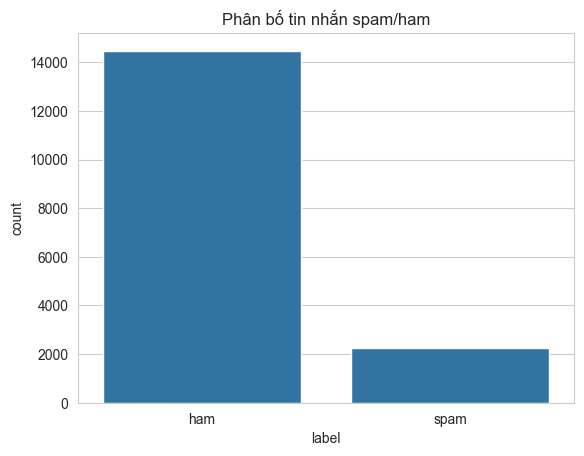


----- Thống kê độ dài tin nhắn -----
count    16718.000000
mean        80.415241
std         59.865047
min          2.000000
25%         36.000000
50%         61.000000
75%        122.000000
max        910.000000
Name: length, dtype: float64


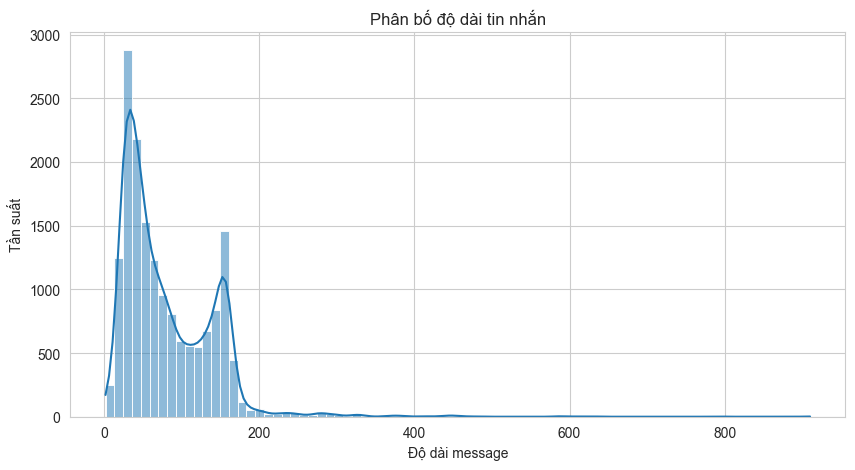

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
##### Khai phá dữ liệu spam #####
# 1. Load dữ liệu
df = pd.read_csv("DATA/spam_all.csv", encoding="latin1")

# 2. Xem thông tin
print("----- Thông tin dữ liệu -----")
print(df.info())
print("\n----- 5 dòng đầu -----")
print(df.head())

# 3. Kiểm tra giá trị thiếu
print("\n----- Giá trị thiếu -----")
print(df.isnull().sum())

# 4. Thống kê phân bố nhãn
print("\n----- Phân bố spam/ham -----")
print(df['label'].value_counts())

# Vẽ biểu đồ phân bố nhãn
sns.countplot(data=df, x='label')
plt.title("Phân bố tin nhắn spam/ham")
plt.show()

# 5. Tính độ dài tin nhắn
df['length'] = df['message'].astype(str).apply(len)

print("\n----- Thống kê độ dài tin nhắn -----")
print(df['length'].describe())

# 6. Vẽ biểu đồ độ dài
plt.figure(figsize=(10,5))
sns.histplot(df['length'], bins=80, kde=True)
plt.title("Phân bố độ dài tin nhắn")
plt.xlabel("Độ dài message")
plt.ylabel("Tần suất")
plt.show()






----- Dữ liệu đã sẵn sàng cho Deep Learning -----
Hình dạng ma trận đặc trưng (X.shape): (4482, 3000)
Hình dạng vector nhãn (y.shape): (4482,)


D:\school\se1_year4\IntSys\tieu_luan\code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



----- Tóm tắt cấu trúc mô hình Deep Learning -----


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       384,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,449 (1.50 MB)

 Trainable params: 392,449 (1.50 MB)

 Non-trainable params: 0 (0.00 B)


----- Bắt đầu Huấn luyện mô hình -----
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.8312 - loss: 0.4917 - val_accuracy: 0.9688 - val_loss: 0.1302
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9766 - loss: 0.0773 - val_accuracy: 0.9833 - val_loss: 0.0452
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9925 - loss: 0.0278 - val_accuracy: 0.9900 - val_loss: 0.0301
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9980 - loss: 0.0121 - val_accuracy: 0.9911 - val_loss: 0.0215
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9989 - loss: 0.0071 - val_accuracy: 0.9933 - val_loss: 0.0194
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9933 - val_loss: 0.0195
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9933 - val_loss: 0.0187
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - ac

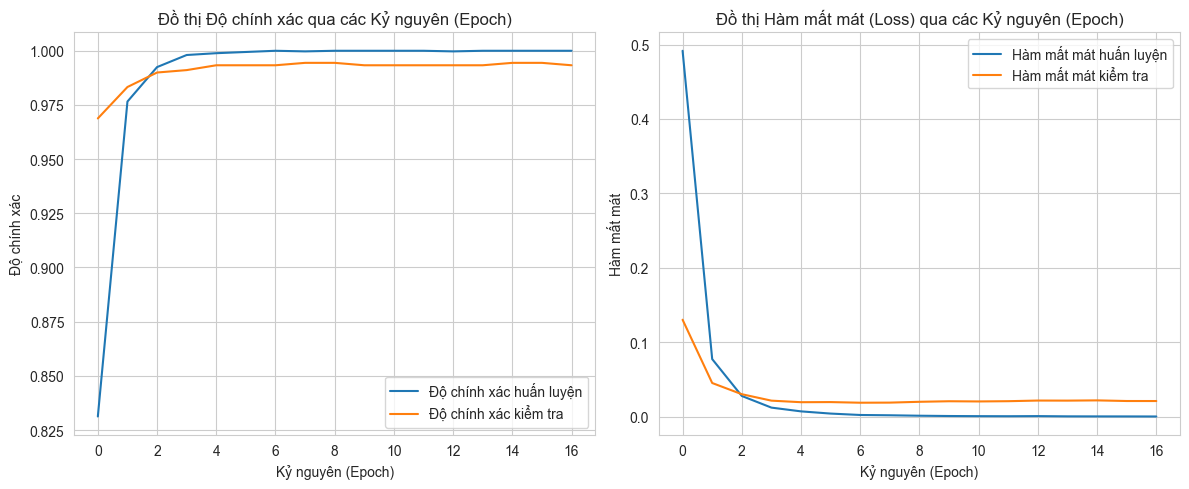


----- Kết quả trực quan hóa -----
Đồ thị bên trái hiển thị 'Độ chính xác' của mô hình trên tập huấn luyện và kiểm tra. [Image of Training and Validation Accuracy Chart]
Đồ thị bên phải hiển thị 'Hàm mất mát' (Loss) của mô hình trên tập huấn luyện và kiểm tra. 
Mục tiêu là thấy đường kiểm tra (validation) theo sát đường huấn luyện (training) mà không có sự khác biệt lớn, cho thấy mô hình không bị overfitting.


In [1]:
# Nguyễn Việt Quang B22DCCN650
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import re
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# -------------------------------------------------------------------------------------
##### Khai phá và Tiền xử lý dữ liệu (Tái tạo lại môi trường) #####
# Giả định các bước trước đã chạy và tạo ra X (TFIDF Matrix) và y (Labels)

# Tải lại dữ liệu (chỉ để đảm bảo script này chạy độc lập)
# Nếu bạn chạy liền mạch, bạn không cần chạy lại phần này, nhưng nó được đưa vào để đảm bảo tính độc lập.
# Nguyễn Việt Quang B22DCCN650
try:
    df = pd.read_csv("DATA/spam_all.csv", encoding="latin1")
except FileNotFoundError:
    print("Không tìm thấy file DATA/spam_all.csv. Đảm bảo file nằm đúng thư mục.")
    exit()

# Nguyễn Việt Quang B22DCCN650
# Cân bằng dữ liệu (như trong code trước)
ham_df = df[df['label'] == 'ham']
spam_df = df[df['label'] == 'spam']
ham_sampled = ham_df.sample(n=len(spam_df), random_state=42)
df_balanced = pd.concat([ham_sampled, spam_df], ignore_index=True)

# Tải stopwords nếu chưa có
# Nguyễn Việt Quang B22DCCN650
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Nguyễn Việt Quang B22DCCN650
def preprocess_text(text):
    """Tiền xử lý văn bản: chuyển chữ thường, xóa số/ký tự đặc biệt, loại bỏ stop words."""
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Áp dụng tiền xử lý
df_balanced['clean_text'] = df_balanced['message'].astype(str).apply(preprocess_text)

# Nguyễn Việt Quang B22DCCN650
# Khởi tạo và Fit/Transform TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=3000)
X_sparse = tfidf_vectorizer.fit_transform(df_balanced['clean_text'])
# Chuyển ma trận thưa (sparse) X thành ma trận dày (dense) cho Keras
X = X_sparse.toarray()
# Nhãn (y)
y = df_balanced['label'].map({'ham':0, 'spam':1})

print(f"\n----- Dữ liệu đã sẵn sàng cho Deep Learning -----")
print(f"Hình dạng ma trận đặc trưng (X.shape): {X.shape}")
print(f"Hình dạng vector nhãn (y.shape): {y.shape}")
# -------------------------------------------------------------------------------------


##### Xây dựng và Huấn luyện mô hình Deep Learning #####

# Nguyễn Việt Quang B22DCCN650
# 1. Phân chia dữ liệu huấn luyện (train) và kiểm tra (test)
# Tỷ lệ 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Nguyễn Việt Quang B22DCCN650
# Số lượng đặc trưng (features) đầu vào
input_dim = X_train.shape[1]
# 2. Định nghĩa mô hình Mạng nơ-ron (MLP - Multi-Layer Perceptron)
model = Sequential()
# Lớp đầu vào (Input Layer) và Lớp ẩn thứ nhất
# Kích thước đầu vào là số lượng đặc trưng TF-IDF (3000)
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5)) # Ngăn chặn overfitting

# Lớp ẩn thứ hai
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Lớp đầu ra (Output Layer)
# 1 nơ-ron vì đây là bài toán phân loại nhị phân (spam/ham: 0/1)
# Sử dụng 'sigmoid' để cho ra xác suất (probability)
model.add(Dense(1, activation='sigmoid'))

# In tóm tắt mô hình
print("\n----- Tóm tắt cấu trúc mô hình Deep Learning -----")
model.summary()

# 3. Biên dịch mô hình (Compile)
# Optimizer: adam là lựa chọn tốt cho đa số bài toán
# Loss: binary_crossentropy cho bài toán phân loại nhị phân
# Metrics: accuracy để theo dõi độ chính xác
# Nguyễn Việt Quang B22DCCN650
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Huấn luyện mô hình
# Thêm EarlyStopping để dừng huấn luyện sớm nếu mô hình không cải thiện
# Nguyễn Việt Quang B22DCCN650
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("\n----- Bắt đầu Huấn luyện mô hình -----")
history = model.fit(
    X_train,
    y_train,
    epochs=50, # Số lượng kỷ nguyên tối đa
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1 # Hiển thị quá trình huấn luyện
)

# Nguyễn Việt Quang B22DCCN650
# 5. Đánh giá mô hình trên tập kiểm tra cuối cùng
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\n----- Đánh giá Mô hình trên Tập Kiểm tra -----")
print(f"Độ chính xác (Accuracy): {accuracy:.4f}")
print(f"Hàm mất mát (Loss): {loss:.4f}")

# Nguyễn Việt Quang B22DCCN650
# 6. Trực quan hóa kết quả huấn luyện (Độ chính xác và Hàm mất mát)
history_dict = history.history

# ----- Đồ thị Độ chính xác -----
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history_dict['val_accuracy'], label='Độ chính xác kiểm tra')
plt.title('Đồ thị Độ chính xác qua các Kỷ nguyên (Epoch)')
plt.xlabel('Kỷ nguyên (Epoch)')
plt.ylabel('Độ chính xác')
plt.legend()
plt.grid(True)

# Nguyễn Việt Quang B22DCCN650
# ----- Đồ thị Hàm mất mát -----
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Hàm mất mát huấn luyện')
plt.plot(history_dict['val_loss'], label='Hàm mất mát kiểm tra')
plt.title('Đồ thị Hàm mất mát (Loss) qua các Kỷ nguyên (Epoch)')
plt.xlabel('Kỷ nguyên (Epoch)')
plt.ylabel('Hàm mất mát')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Thêm một mô tả ngắn về quá trình
print("\n----- Kết quả trực quan hóa -----")
print("Đồ thị bên trái hiển thị 'Độ chính xác' của mô hình trên tập huấn luyện và kiểm tra. [Image of Training and Validation Accuracy Chart]")
print("Đồ thị bên phải hiển thị 'Hàm mất mát' (Loss) của mô hình trên tập huấn luyện và kiểm tra. ")
print("Mục tiêu là thấy đường kiểm tra (validation) theo sát đường huấn luyện (training) mà không có sự khác biệt lớn, cho thấy mô hình không bị overfitting.")